In [14]:
# Set up the imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [15]:
def f1(x):
    return x ** 2 + 3 * x + 8

def f1d(x):
    return 2*x+3

xlim1=[-5,5]


In [16]:
xlim3=[-10,10]
ylim3=[-10,10]

def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4


In [17]:
xlim4 = [-np.pi, np.pi]
ylim4 = [-np.pi, np.pi]


def f4(x,y):
    return np.exp(-(x - y)**2) * np.sin(y)

def df4_dx(x, y):
    return -2 * np.exp(-(x - y)**2) * np.sin(y) * (x - y)

def df4_dy(x, y):
    return np.exp(-(x - y)**2) * np.cos(y) + 2 * np.exp(-(x - y)**2) * np.sin(y)*(x - y)


In [18]:
xlim5=[0,2*np.pi]

def f5(x):
    return np.cos(x)**4 - np.sin(x)**3 - 4*np.sin(x)**2 + np.cos(x) + 1

def f5d(x):
    return -4*(np.cos(x)**3)*np.sin(x)-3*(np.sin(x))**2*np.cos(x)-8*np.sin(x)*np.cos(x)-np.sin(x)


In [8]:
def gradient_descent(fn,derivs,lims):
    alpha=0.02 #learning rate
    optim=[]
    l1=len(derivs)
    a1=[0]*l1
    max_step=100  #check hyperparam tuning
    for i in range(max_step):
        optima=10000
        a2=np.zeros(l1)
        for j in range(l1):
            num=np.random.uniform(range[j][0],range[j][1])
            a2[j]+=num
            for k in range(1000):
                value=fn(a2)
                if optima<=val:
                    break
                else:
                    a1=a2
                    optima=val
                    for m in range(l1):
                        x=a2[m]-derivs[m]*a2
                        if x>=range[j][0] and x<=range[j][1]:
                            a2[m]=x
                        else:
                            a2=a1
                            
                        
                        
                        
                    
        
            

In [9]:
import numpy as np

def gradient_desc(fn, derivs, lims):
    alpha = 0.02
    l1 = len(derivs)
    a1 = np.zeros(l1)  # Initialize a1 as a 1D NumPy array filled with zeros
    max_step = 100  # Check hyperparameter tuning
    lims = np.array(lims)  # Convert lims to a NumPy array

    for i in range(max_step):
        a2 = np.random.uniform(lims[:, 0], lims[:, 1])
        for k in range(1000):
            gradient = np.array([deriv(a2) for deriv in derivs])
            a2 -= alpha * gradient[0][0]
            a2 = np.clip(a2, lims[:, 0], lims[:, 1])  # Ensure a2 is within the specified limits
            value = fn(a2)
            if value >= fn(a1):
                break
            else:
                a1 = a2

    return a1, fn(a1)


In [10]:
print(gradient_desc(f1,[f1d],[xlim1]))

(array([-1.3938973]), array([5.76125778]))


In [11]:
import numpy as np

def gradient_desc2(fn, derivs, lims):
    alpha = 0.02
    l1 = len(derivs)
    a1 = np.zeros(l1)  # Initialize a1 as a 1D NumPy array filled with zeros
    max_step = 100  # Check hyperparameter tuning
    lims = np.array(lims)  # Convert lims to a NumPy array

    for i in range(max_step):
        a2 = np.random.uniform(lims[:, 0], lims[:, 1])
        for k in range(1000):
            gradient = np.array([deriv(a2[0], a2[1]) for deriv in derivs])  # Pass both x and y
            a2 -= alpha * gradient
            a2 = np.clip(a2, lims[:, 0], lims[:, 1])  # Ensure a2 is within the specified limits

            value = fn(a2[0], a2[1])  # Pass both x and y
            if value >= fn(a1[0], a1[1]):
                break
            else:
                a1 = a2

    return a1, fn(a1[0], a1[1])  # Pass both x and y to the objective function


In [12]:
print(gradient_desc2(f3,[df3_dx,df3_dy],[xlim3,ylim3]))

(array([3.8936178 , 1.23813942]), 2.580559624799264)


The coordinates for minima is -1.4999999993888893
The value at minima is 5.75


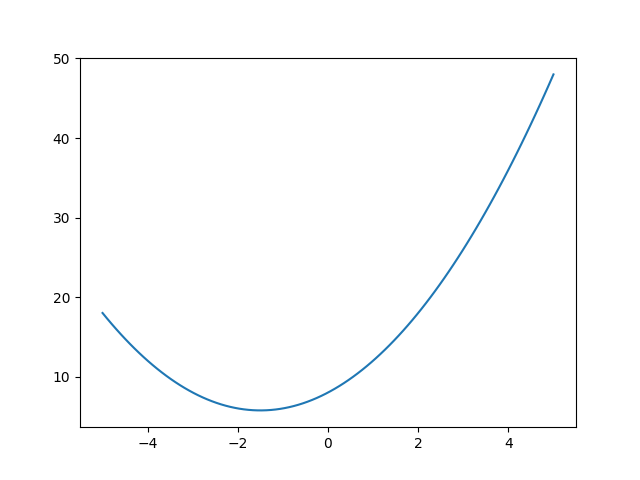

The coordinates for minima is 1.661660812043789
The value at minima is -4.045412051572552


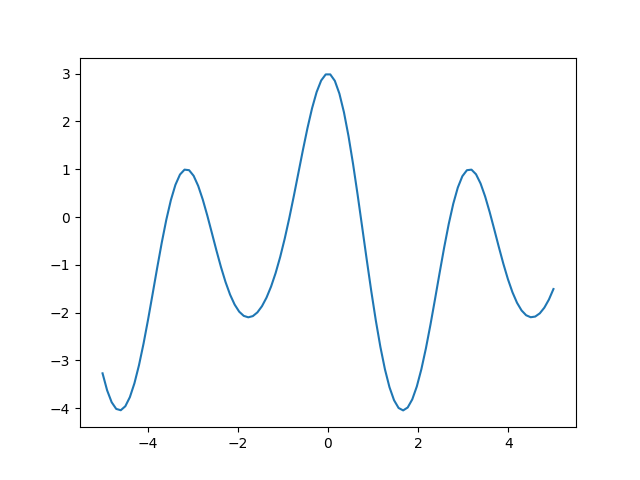

The coordinates for minima is -1.5521078213194301,-1.556650947799169
The value at minima is -0.9998793180744019


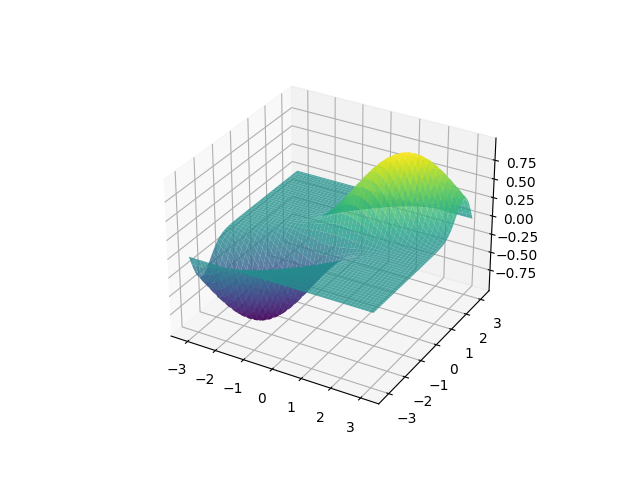

In [13]:
def gradDesc1(f, df_dx, xlim, x, lr=0.1, num_iterations=100):
    #xlim[0] will store lower lim and [1] will store upper
    xbase = np.linspace(xlim[0],xlim[1], 100) #creates base of 100 divisions 
    ybase = f(xbase)
    bestcost = 100000 #initialising best cost to a very high value
    fig, ax = plt.subplots()
    ax.plot(xbase, ybase)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro-')
    lngood, = ax.plot([], [], 'go', markersize=10)

    #lr = 0.05 #learning rate

    def update(frame):
        nonlocal x, lr
        xall.append(x)
        yall.append(f(x))
        x = x - df_dx(x) * lr
        y = f(x)
        lngood.set_data(x, y)
        lnall.set_data(xall, yall)
        return lngood,
    for i in range(num_iterations):
        x = x - df_dx(x) * lr
        y = f(x)
    print(f"The coordinates for minima is {x}")
    print(f"The value at minima is {y}")
    ani= FuncAnimation(fig, update, frames=num_iterations, interval=10000, blit=True)

    plt.show()
    ani.save('animation.gif', writer='imagemagick',fps=30)

def gradDesc2(f, df_dx, df_dy, xlim, ylim, x, y, lr, num_iterations):
    # Create data
    xbase = np.linspace(xlim[0], xlim[1], 100)
    ybase = np.linspace(ylim[0], ylim[1], 100)

    # Create a meshgrid for 3D plotting
    X, Y = np.meshgrid(xbase, ybase)
    Z = f(X, Y)

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the 3D surface
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    # Create initial points
    xall, yall, zall = [x], [y], [f(x, y)]
    line, = ax.plot([], [], [], 'go-')

    def update(frame):
        nonlocal x, y
        x = x - df_dx(x, y) * lr
        y = y - df_dy(x, y) * lr
        z = f(x, y)

        xall.append(x)
        yall.append(y)
        zall.append(z)

        line.set_data(xall, yall)
        line.set_3d_properties(zall)
        return line,
    for i in range(num_iterations):
        x = x - df_dx(x, y) * lr
        y = y - df_dy(x, y) * lr
        z = f(x, y)
    print(f"The coordinates for minima is {x},{y}")
    print(f"The value at minima is {z}")
    # Animation setup
    ani = FuncAnimation(fig, update, frames=num_iterations, interval=100, blit=True)

    # Show the plot
    plt.show()
    ani.save('Animation.gif', writer='imagemagick', fps=30)


gradDesc1(f1, f1d, xlim1, x=1.5, lr=0.1, num_iterations=100)
gradDesc1(f5, f5d, xlim1, x=np.pi/4, lr=0.1, num_iterations=100)
gradDesc2(f4, df4_dx, df4_dy, xlim4, ylim4, x=0, y=0,lr=0.1,num_iterations=100)
gradDesc2(f3, df3_dx, df3_dy, xlim3, ylim3, x=3.5, y=1.5,lr=0.05,num_iterations=100)                                                                                                                                                       123,1         Bot                                                                                                                                                               45,1          50%